# Importing Intial Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Reading Data

In [ ]:
df=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [ ]:
df['Year_of_Release']=df['Year_of_Release'].fillna(int(np.mean(df['Year_of_Release'])))
df['Genre']=df['Genre'].fillna('Unknown Genre')
df['Publisher']=df.Publisher.fillna('Unknown Publisher')

# How much Sales is done Per Year?

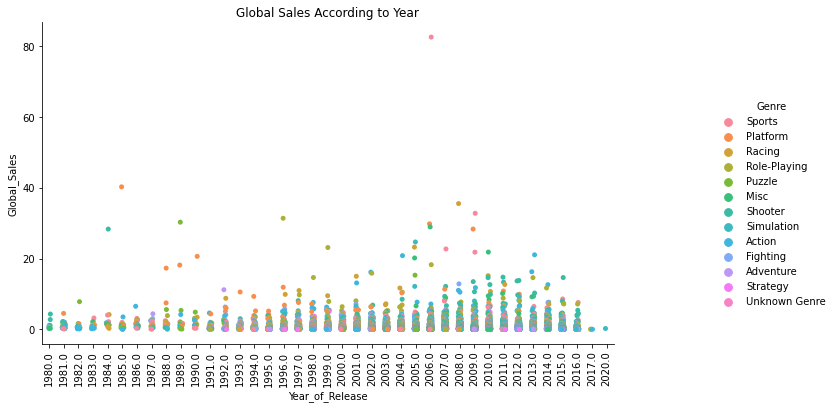

In [ ]:
g=sns.catplot(x='Year_of_Release',y='Global_Sales',data=df,hue='Genre')
plt.title('Global Sales According to Year')
plt.xticks(rotation=90)
g.fig.set_figwidth(12)

# Games Frequency Distribution According to Year


In [ ]:
px.histogram(df,x='Year_of_Release',color='Genre',hover_data=['Name','Platform','Publisher'])

# Number of Count of Video Games per Genre

In [ ]:
px.histogram(df,x='Year_of_Release',y='Genre',color='Publisher')

# Average Sales In Millions


In [ ]:
px.pie(data_frame=df,title='Average Sales in Millions',values=[np.sum(df['NA_Sales']),np.sum(df['JP_Sales']),np.sum(df['EU_Sales']),np.sum(df['Other_Sales'])],names=['North American Sales','Japanese Sales','European Sales','Other Sales'])

# Analysis of Best Selling Video Games

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=4, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.05,
                    subplot_titles=['Top 10 Best Selling Games in North America',
                                    'Top 10 Best Selling Games in Europe',
                                    'Top 10 Best Selling Games in Japna',
                                    'Top 10 Best Selling Games in Other Countries'
                                    ]
                    )
temp=df.head(10)
fig.add_trace(go.Scatter(x=temp['Name'], y=temp['NA_Sales']),
              row=1, col=1)

fig.add_trace(go.Scatter(x=temp['Name'], y=temp['EU_Sales']),
              row=2, col=1)

fig.add_trace(go.Scatter(x=temp['Name'], y=temp['JP_Sales']),
              row=3, col=1)
fig.add_trace(go.Scatter(x=temp['Name'], y=temp['Other_Sales']),
              row=4, col=1)
fig.update_layout(height=800, width=600,
                  title_text="Analysis of Top Video Games")
fig.show()

# Best Selling Genres

In [ ]:
map={}
for i in df.iloc[:,:].values:
  if(i[3] not in map):
    map[i[3]]=0
  map[i[3]]+=i[9]
px.bar(x=list(map.keys()),y=list(map.values()),labels={'y':'Genre Count','x':'Genre'})

# Number of Sales According to Publisher of Top 500 Games

In [ ]:
px.bar(df.head(500),x='Publisher',y='Global_Sales',color='Genre')

# Number of Sales of Per Year

In [ ]:
px.bar(df,x='Year_of_Release',y='Global_Sales',color='Genre')

# Global Sales Predictions


Reading Data Set

In [ ]:
df=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

Dropping Unnecessary Columns

In [ ]:
df.drop(columns = ['Year_of_Release', 'Developer', 'Publisher', 'Platform'], inplace = True)

In [ ]:
x=df.iloc[:,:].values
y=df.iloc[:,6:7]
x=np.delete(x,6,1)

Spliting The DataSet for Training

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,Y_train,Y_test=tts(x,y,test_size=0.3)
games_in_training_set = x_train[:, 0]
games_in_test_set = x_test[:, 0]

Dropping Name Column

In [ ]:
x_train=x_train[:,1:]
x_test=x_test[:,1:]

Imputing The Test and training Case

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer()
x_train[:, [5 ,6, 7, 8]] = imputer.fit_transform(x_train[:, [5, 6, 7, 8]])
x_test[:, [5 ,6, 7, 8]] = imputer.fit_transform(x_test[:, [5, 6, 7, 8]])

Using Categorical imputer to Fill nan Values with 'NA'


In [ ]:
from sklearn_pandas import CategoricalImputer
categorical_imputer = CategoricalImputer(strategy = 'constant', fill_value = 'NA')
x_train[:, [0, 9]] = categorical_imputer.fit_transform(x_train[:, [0, 9]])
x_test[:, [0, 9]] = categorical_imputer.transform(x_test[:, [0, 9]])

Using Column Transformer Transfrom every Column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0, 9])], remainder = 'passthrough') 
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

Creating and Training The Model

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 200, learning_rate= 0.08)
model.fit(x_train, Y_train)

[07:19:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# Predicting The Sales and Putting them in a seperate Dataset

In [ ]:
Y_pred = model.predict(x_test)
games_in_test_set = games_in_test_set.reshape(-1,0)
Y_pred = Y_pred.reshape(-1, 1)
predictions = np.concatenate([games_in_test_set, Y_pred, Y_test], axis = 1)
predictions = pd.DataFrame(predictions, columns = ['Name', 'Predicted_Global_Sales', 'Actual_Global_Sales'])

ValueError: ignored

In [ ]:
predictions.head(10)

,Name,Predicted_Global_Sales,Actual_Global_Sales
0,Blitz: The League,0.165212,0.16
1,The Incredible Hulk,0.237621,0.24
2,Dorabase 2: Nettou Ultra Stadium,0.122043,0.12
3,Theme Hospital,2.43215,2.4
4,Move Fitness,0.270584,0.21
5,G-Force,0.357866,0.35
6,Robot Alchemic Drive,0.0642453,0.07
7,NPPL: Championship Paintball 2009,0.122834,0.12
8,Hunted: The Demon's Forge,0.218693,0.22
9,J-League Pro Soccer Club o Tsukurou! 3,0.522864,0.52


Calculating r2 Score

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import math
r2_score = r2_score(Y_test, Y_pred)
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"r2 score of the model : {r2_score:.3f}")
print(f"Root Mean Squared Error of the model : {rmse:.3f}")

r2 score of the model : 0.861
Root Mean Squared Error of the model : 0.691


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Y_test,Y_pred))

0.04283008089690117


Scatter Plot of Prediction and Test Data

In [ ]:
px.scatter(predictions,title='Scatter Plot of Predicted_values and Actual Values',x='Actual_Global_Sales',y='Predicted_Global_Sales',hover_data=['Name'],log_x=True,size_max=500)